In [3]:
import boto3
import os
from PIL import Image
import io
import matplotlib.pyplot as plt

In [8]:
import boto3

# Initialize a session using Amazon S3
s3 = boto3.client('s3')

# Define the bucket name
bucket_name = 'covid19-ct-scan-proj'

# List objects within a specific prefix (folder)
def list_s3_objects(bucket_name, prefix=''):
    objects = []
    result = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
    if 'Contents' in result:
        objects.extend(result['Contents'])
        while result['IsTruncated']:
            continuation_key = result['NextContinuationToken']
            result = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix, ContinuationToken=continuation_key)
            objects.extend(result['Contents'])
    return objects

def get_ct_image(bucket_name, key):
    response = s3.get_object(Bucket=bucket_name, Key=key)
    image_data = response['Body'].read()
    image = Image.open(io.BytesIO(image_data))
    return image

def display_image_grid(image_keys, bucket_name, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(12,8))
    axes = axes.flatten()
    for ax, key in zip(axes, image_keys):
        image = get_ct_image(bucket_name, key)
        ax.imshow(image)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# Get all objects in the train/covid folder
covid_objects = list_s3_objects(bucket_name, prefix='train/covid/')

# Get all objects in the train/non-covid folder
non_covid_objects = list_s3_objects(bucket_name, prefix='train/noncovid/')

# Calculate the lengths
covid_count = len(covid_objects)
non_covid_count = len(non_covid_objects)

# Print the results
print(f"Number of COVID images: {covid_count}")
print(f"Number of non-COVID images: {non_covid_count}")


Number of COVID images: 56113
Number of non-COVID images: 50063


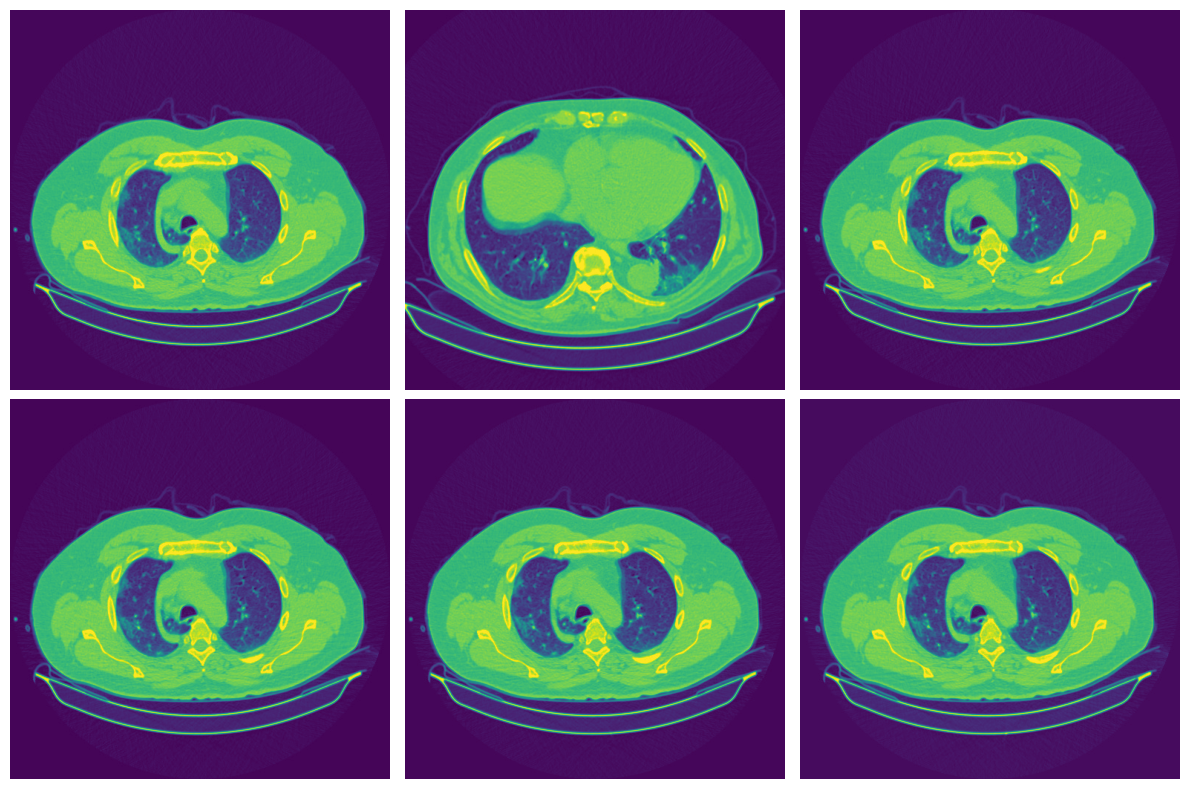

In [11]:
if covid_objects:
    covid_image_key = [obj['Key'] for obj in covid_objects[20:26]]
    display_image_grid(covid_image_key, bucket_name)


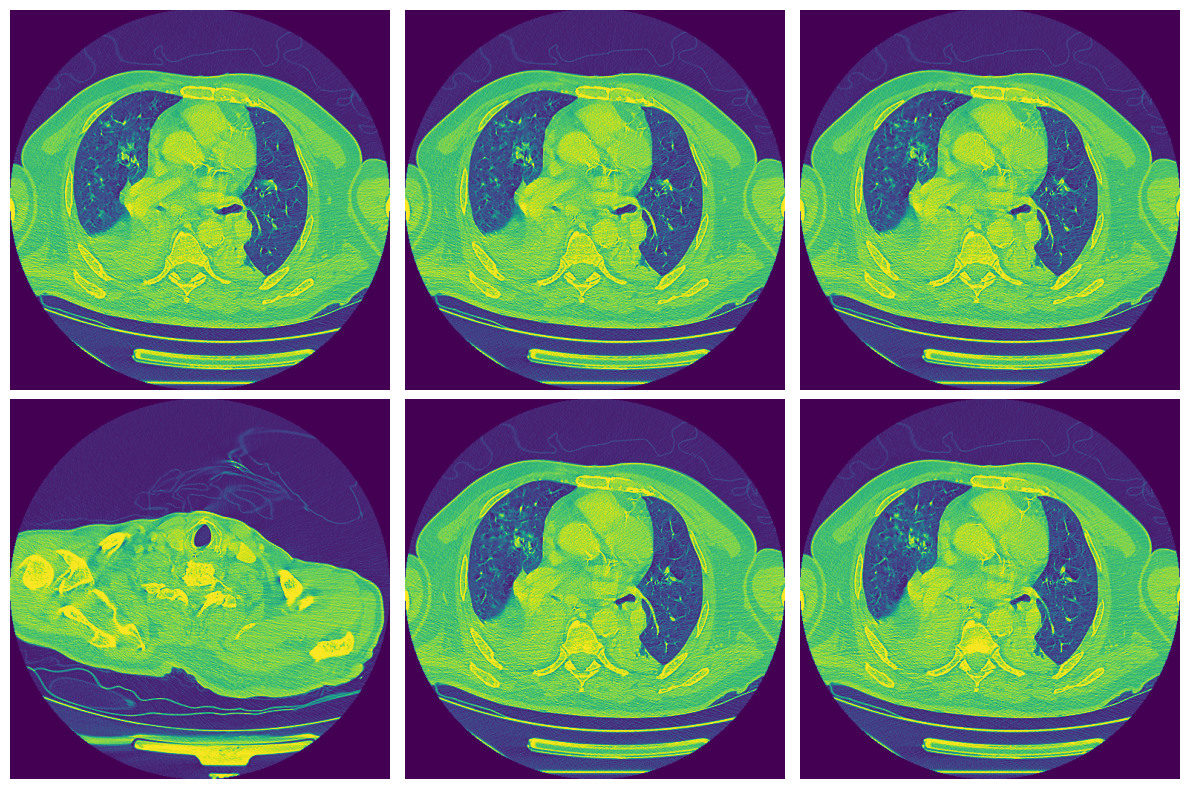

In [10]:
if non_covid_objects:
    non_covid_image_keys = [obj['Key'] for obj in non_covid_objects]
    display_image_grid(non_covid_image_keys, bucket_name)